In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import re
import numpy as np

In [36]:
saving_dir = 'F:\Documents\cours_mva\stages\Padova\july_work\meeting_21_7' 
n = 11164352

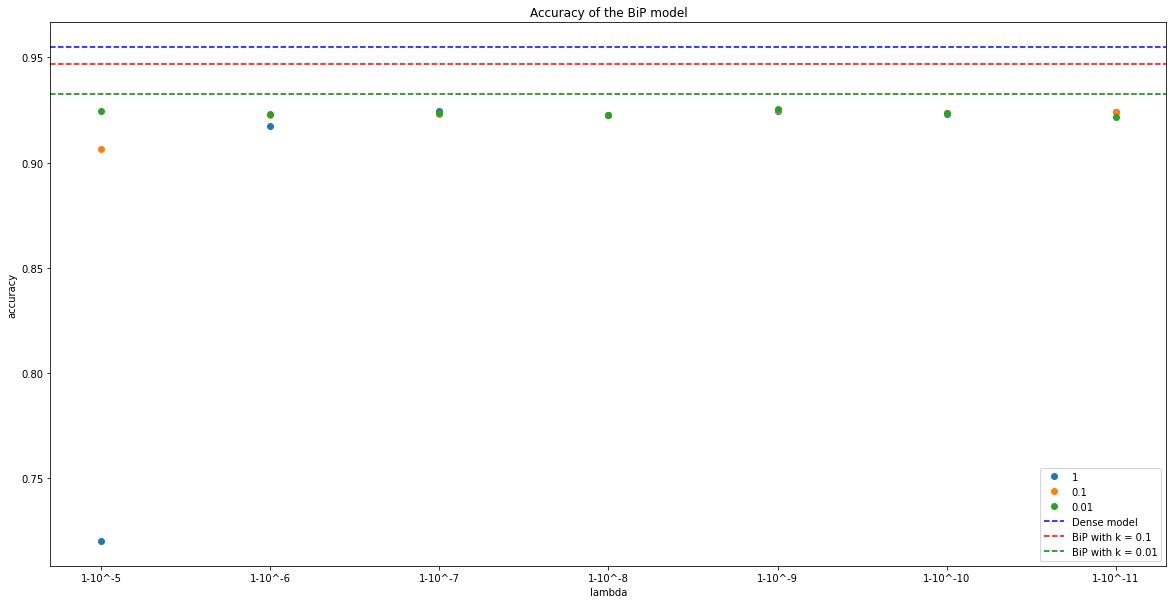

In [43]:
#for every pb1 exp plot the accuracies.
xs = ['1-10^-{}'.format(5+i) for i in range(7)]

#get the accuracies by looping through the current folder
accuracies_1 = [None] * 7
accuracies_01 = [None] * 7
accuracies_001 = [None] * 7

for folder in os.listdir('./'):
    if 'pb1' in folder:
        #get the accuracy
        with open(os.path.join(folder, 'setup.log'), 'r') as file:
            contents = file.read()
            pattern = r'validation accuracy\s+(\d+\.\d+)' 
            matches = re.findall(pattern, contents)
            max_accuracy = max([float(match) for match in matches])

            #we have to get the lambda value from the folder name
            #it follows 'l' and ends before the next character that is not numeric
            pattern = r'l\d+'
            matches = re.findall(pattern, folder)
            lambda_value = int(float(matches[0][1:]))
            
            #the index is then i = lambda_value - 5
            i = lambda_value - 5
            if folder.endswith('001'):
                accuracies_001[i] = max_accuracy/100
            elif folder.endswith('01'):
                accuracies_01[i] = max_accuracy/100
            else:
                accuracies_1[i] = max_accuracy/100
            

#get a big zoom on the figure
plt.figure(figsize=(20,10))

#plot the accuracies without line joining the points
plt.plot(xs, accuracies_1, 'o', label='1')
plt.plot(xs, accuracies_01, 'o', label='0.1')
plt.plot(xs, accuracies_001, 'o', label='0.01')

#plot the accuracy of the dense model with a dashed line at 95.5%
plt.axhline(y=0.955, color='b', linestyle='--', label='Dense model')
#plot the accuracy of the BiP model with a dashed line at 94.7%, with k = 0.1
plt.axhline(y=0.947, color='r', linestyle='--', label='BiP with k = 0.1')
#plot the accuracy of the BiP model with a dashed line at 93.25%, with k = 0.01
plt.axhline(y=0.9325, color='g', linestyle='--', label='BiP with k = 0.01')

plt.legend()
plt.xlabel('lambda')
plt.ylabel('accuracy')

plt.title('Accuracy of the BiP model')

#save the figure 
plt.savefig(os.path.join(saving_dir, 'FIGURE_1.png'), dpi=300, facecolor='w')

plt.show()

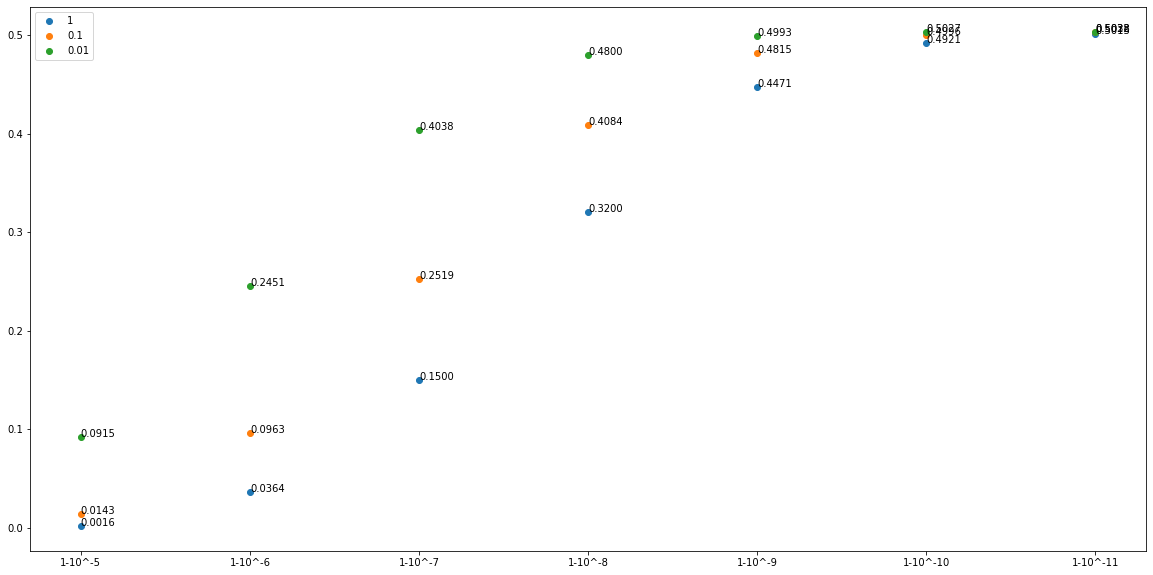

In [47]:
#get the final l0 norm for all pb1 exps
xs = ['1-10^-{}'.format(5+i) for i in range(7)]

#get the accuracies by looping through the current folder
norms_1 = [None] * 7
norms_01 = [None] * 7
norms_001 = [None] * 7

for folder in os.listdir('./'):
    if 'pb1' in folder:
        #get the accuracy
        with open(os.path.join(folder, 'setup.log'), 'r') as file:
            
            #we want to have the l0 norm associated with the epoch that gave the best accuracy
            #so we have to get the epoch number
            contents = file.read()
            pattern = r'validation accuracy\s+(\d+\.\d+)' 
            matches = re.findall(pattern, contents)
            
            #get the epoch number
            epoch_number = matches.index(max(matches))

            #now we open 'epochs_data.npy' and get the l0 norm at the right epoch
            epochs_data = np.load(os.path.join(folder, 'epochs_data.npy'), allow_pickle=True)
            l0_norm = epochs_data[epoch_number][0]

            #we have to get the lambda value from the folder name
            #it follows 'l' and ends before the next character that is not numeric
            pattern = r'l\d+'
            matches = re.findall(pattern, folder)
            lambda_value = int(float(matches[0][1:]))
            
            #we have to get the lambda value from the folder name
            #it follows 'l' and ends before the next character that is not numeric
            pattern = r'l\d+'
            matches = re.findall(pattern, folder)
            lambda_value = int(float(matches[0][1:]))

            
            #the index is then i = lambda_value - 5
            i = lambda_value - 5
            if folder.endswith('001'):
                norms_001[i] = l0_norm/n
            elif folder.endswith('01'):
                norms_01[i] = l0_norm/n
            else:
                norms_1[i] = l0_norm/n
            

#get a big zoom on the figure
plt.figure(figsize=(20,10))

#plot the accuracies without line joining the points
#at each point, annotate the value of the l0 norm
plt.plot(xs, norms_1, 'o', label='1')
for i, norm in enumerate(norms_1):
    plt.annotate('{:.4f}'.format(norm), (xs[i], norms_1[i]))

plt.plot(xs, norms_01, 'o', label='0.1')
for i, norm in enumerate(norms_01):
    plt.annotate('{:.4f}'.format(norm), (xs[i], norms_01[i]))

plt.plot(xs, norms_001, 'o', label='0.01')
for i, norm in enumerate(norms_001):
    plt.annotate('{:.4f}'.format(norm), (xs[i], norms_001[i]))


plt.legend()

#save the figure 
plt.savefig(os.path.join(saving_dir, 'FIGURE_2.png'), dpi=300, facecolor='w')

plt.show()


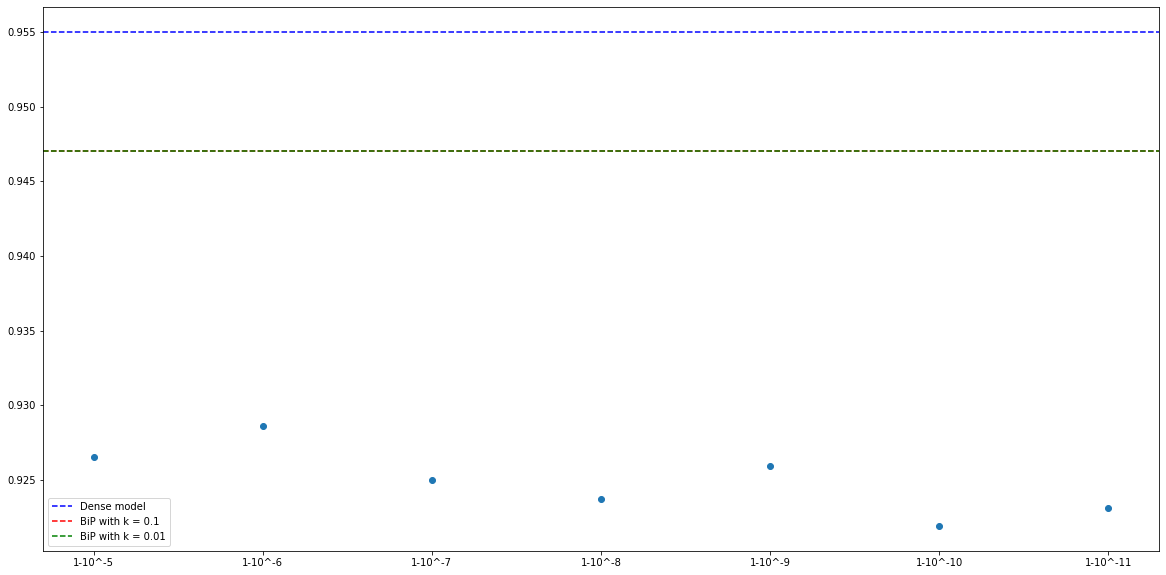

In [22]:
#for every pb1 exp plot the accuracies.
xs = ['1-10^-{}'.format(5+i) for i in range(7)]

#get the accuracies by looping through the current folder
accuracies = []

for folder in os.listdir('./'):
    if 'pb2' in folder:
        #get the accuracy
        with open(os.path.join(folder, 'setup.log'), 'r') as file:
            contents = file.read()
            pattern = r'validation accuracy\s+(\d+\.\d+)' 
            matches = re.findall(pattern, contents)
            max_accuracy = max([float(match) for match in matches])
            accuracies.append(max_accuracy/100)
            

#get a big zoom on the figure
plt.figure(figsize=(20,10))

#plot the accuracies without line joining the points
plt.plot(xs, accuracies, 'o')

#plot the accuracy of the dense model with a dashed line at 95.5%
plt.axhline(y=0.955, color='b', linestyle='--', label='Dense model')
#plot the accuracy of the BiP model with a dashed line at 94.7%, with k = 0.1
plt.axhline(y=0.947, color='r', linestyle='--', label='BiP with k = 0.1')
#plot the accuracy of the BiP model with a dashed line at 93.25%, with k = 0.01
plt.axhline(y=0.947, color='g', linestyle='--', label='BiP with k = 0.01')

plt.legend()

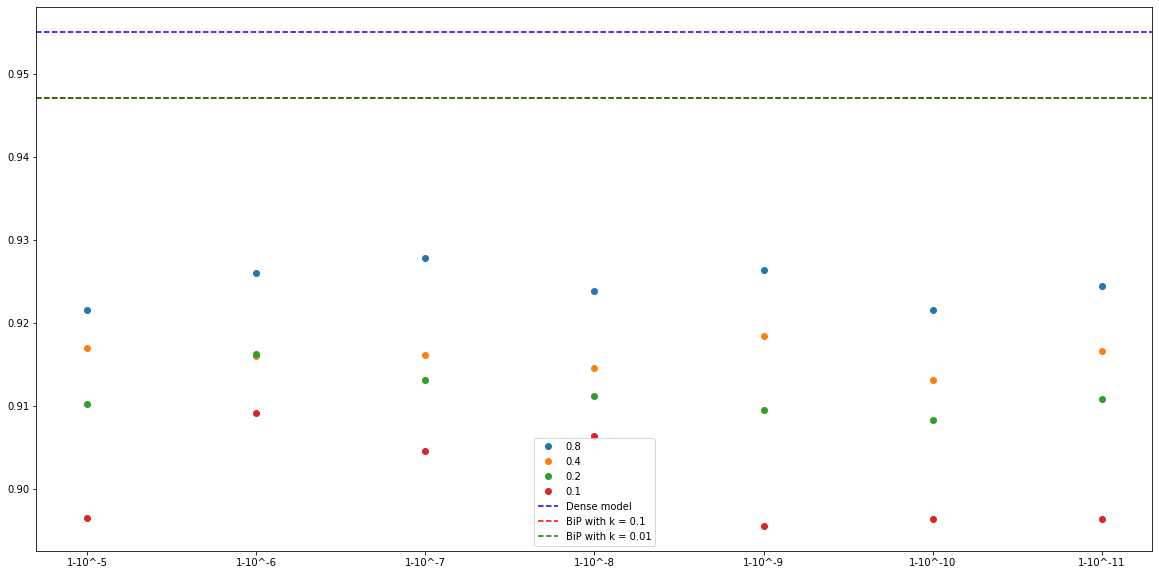

In [27]:
#for every pb1 exp plot the accuracies.
xs = ['1-10^-{}'.format(5+i) for i in range(7)]

#get the accuracies by looping through the current folder
accuracies_08 = []
accuracies_04 = []
accuracies_02 = []
accuracies_01 = []

for folder in os.listdir('./'):
    if 'pb3' in folder:
        #get the accuracy
        with open(os.path.join(folder, 'setup.log'), 'r') as file:
            contents = file.read()
            pattern = r'validation accuracy\s+(\d+\.\d+)' 
            matches = re.findall(pattern, contents)
            max_accuracy = max([float(match) for match in matches])
            if folder.endswith('08'):
                accuracies_08.append(max_accuracy/100)
            elif folder.endswith('04'):
                accuracies_04.append(max_accuracy/100)
            elif folder.endswith('02'):
                accuracies_02.append(max_accuracy/100)
            else:
                accuracies_01.append(max_accuracy/100)
            

#get a big zoom on the figure
plt.figure(figsize=(20,10))

#plot the accuracies without line joining the points
plt.plot(xs, accuracies_08, 'o', label='0.8')
plt.plot(xs, accuracies_04, 'o', label='0.4')
plt.plot(xs, accuracies_02, 'o', label='0.2')
plt.plot(xs, accuracies_01, 'o', label='0.1')

#plot the accuracy of the dense model with a dashed line at 95.5%
plt.axhline(y=0.955, color='b', linestyle='--', label='Dense model')
#plot the accuracy of the BiP model with a dashed line at 94.7%, with k = 0.1
plt.axhline(y=0.947, color='r', linestyle='--', label='BiP with k = 0.1')
#plot the accuracy of the BiP model with a dashed line at 93.25%, with k = 0.01
plt.axhline(y=0.947, color='g', linestyle='--', label='BiP with k = 0.01')

plt.legend()

In [ ]:
#for every pb1 exp plot the accuracies.
xs = ['1-10^-{}'.format(5+i) for i in range(7)]

#get the accuracies by looping through the current folder
accuracies_1 = []
accuracies_01 = []
accuracies_001 = []

for folder in os.listdir('./'):
    if 'pb1' in folder:
        #get the accuracy
        with open(os.path.join(folder, 'setup.log'), 'r') as file:
            contents = file.read()
            pattern = r'validation accuracy\s+(\d+\.\d+)' 
            matches = re.findall(pattern, contents)
            max_accuracy = max([float(match) for match in matches])
            if folder.endswith('001'):
                accuracies_001.append(max_accuracy/100)
            elif folder.endswith('01'):
                accuracies_01.append(max_accuracy/100)
            else:
                accuracies_1.append(max_accuracy/100)
            

#get a big zoom on the figure
plt.figure(figsize=(20,10))

#plot the accuracies without line joining the points
plt.plot(xs, accuracies_1, 'o', label='1')
plt.plot(xs, accuracies_01, 'o', label='0.1')
plt.plot(xs, accuracies_001, 'o', label='0.01')

#plot the accuracy of the dense model with a dashed line at 95.5%
plt.axhline(y=0.955, color='b', linestyle='--', label='Dense model')
#plot the accuracy of the BiP model with a dashed line at 94.7%, with k = 0.1
plt.axhline(y=0.947, color='r', linestyle='--', label='BiP with k = 0.1')
#plot the accuracy of the BiP model with a dashed line at 93.25%, with k = 0.01
plt.axhline(y=0.947, color='g', linestyle='--', label='BiP with k = 0.01')

plt.legend()

In [5]:
import matplotlib.animation as animation

#open the file epochs_data.npy in the current directory
epochs_data = np.load('epochs_data.npy', allow_pickle=True)
outer_gradients = epochs_data[0][-2]
masks = epochs_data[0][-1]

MovieWriter ffmpeg unavailable; using Pillow instead.


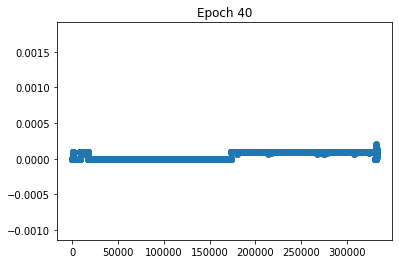

In [13]:
vectors = outer_gradients
fig, ax = plt.subplots()

# Initialize a scatter object for the plot
scatter = ax.scatter(range(len(vectors[0])), vectors[0])

# Define an update function for the animation
def update(i):
    scatter.set_offsets(np.c_[range(len(vectors[i])), vectors[i]])  # update the data of the scatter object
    #put the number of the epoch in the title
    ax.set_title('Epoch {}'.format(i))
    return scatter,

# Create an animation
ani = animation.FuncAnimation(fig, update, frames=len(vectors), interval=800)

path = os.path.join(saving_dir, 'animation.gif')
ani.save(path, writer='ffmpeg', fps=1/0.8)

plt.show()

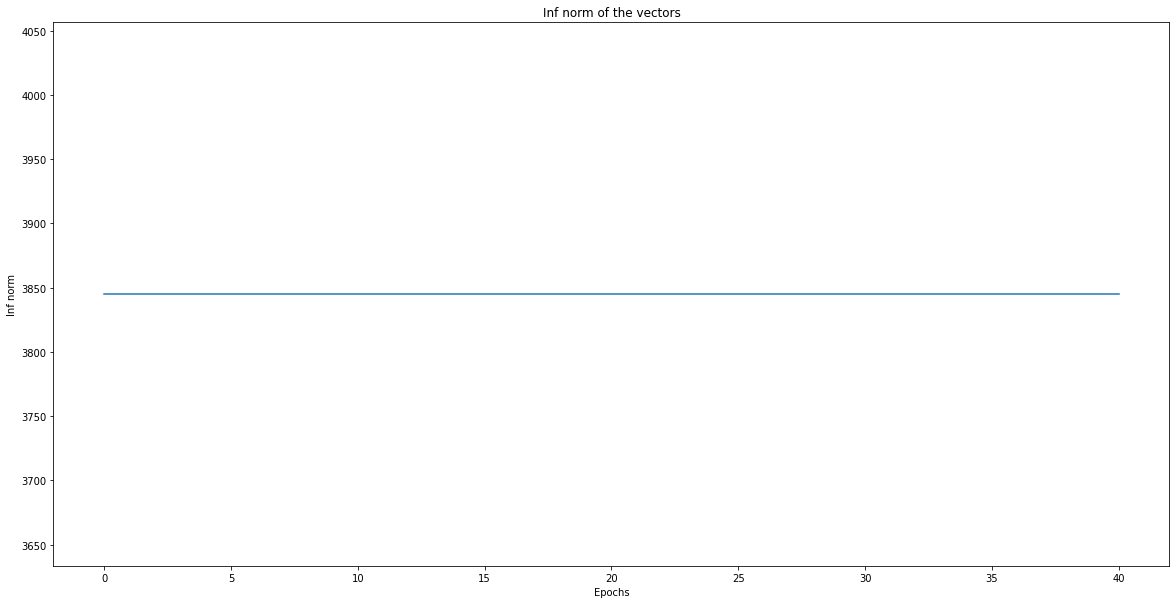

In [18]:
#plot the inf norm of the outer gradients
vectors = masks
plt.figure(figsize=(20,10))
plt.plot(range(len(vectors)), [np.linalg.norm(vector, ord=0) for vector in vectors])
plt.title('Inf norm of the vectors')
plt.xlabel('Epochs')
plt.ylabel('Inf norm')
plt.show()



In [6]:
#we want to know if the support stays the same during the training
#we will plot the number of different elements in the support at each epoch

vectors = outer_gradients
b = True
for i in range(len(vectors)-1):
    print(i)
    #check if support(i) is equal to support(i+1)
    for j in range(len(vectors[i])):
        if vectors[i][j] == 0 and vectors[i+1][j] > 0 or vectors[i][j] > 0 and vectors[i+1][j] == 0:
            print('support({}) is not equal to support({}) at index {}'.format(i, i+1, j))
            print('The values are : {} and {}'.format(vectors[i][j], vectors[i+1][j]))
            b = False
            break

if b :
    print('The support is exactly the same at each epoch')
else:
    print('The support is not the same at each epoch')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
The support is exactly the same at each epoch


In [71]:
#open the file epochs_data.npy in the current directory
epochs_data = np.load('epochs_data.npy', allow_pickle=True)
duality_gaps = [epoch_data[-2][0] for epoch_data in epochs_data]
losses = [epoch_data[-1][0] for epoch_data in epochs_data]

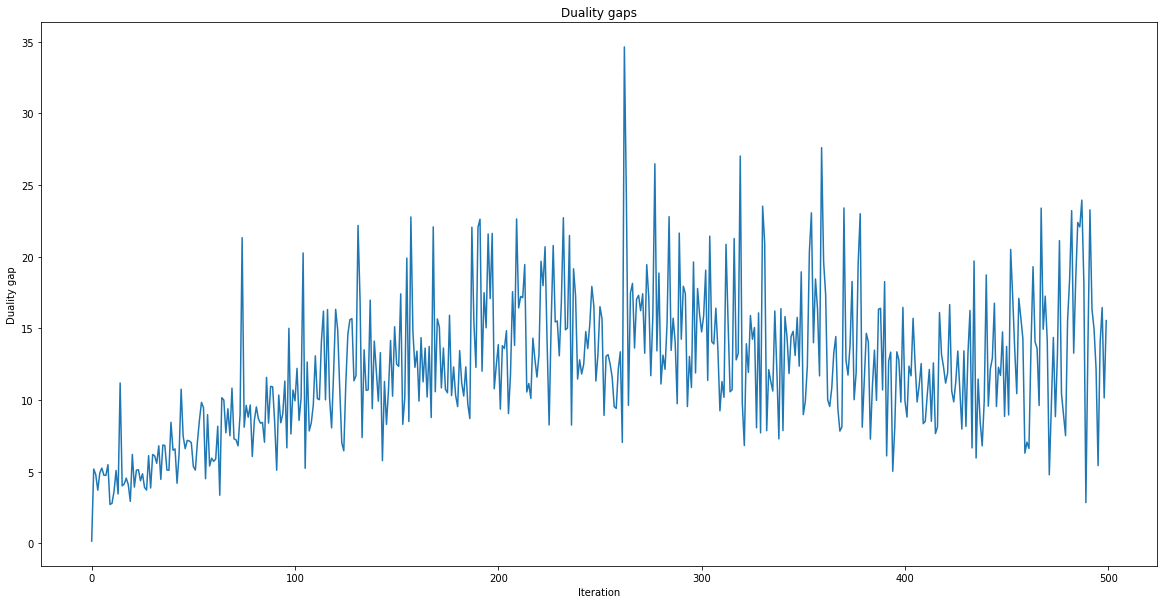

In [52]:
#plot the duality gaps
plt.figure(figsize=(20,10))
plt.plot(range(len(duality_gaps)), duality_gaps)
plt.title('Duality gaps')
plt.xlabel('Iteration')
plt.ylabel('Duality gap')

#save it in the saving_dir
plt.savefig(os.path.join(saving_dir, 'duality_gaps.png'), dpi=300, facecolor='w')

plt.show()

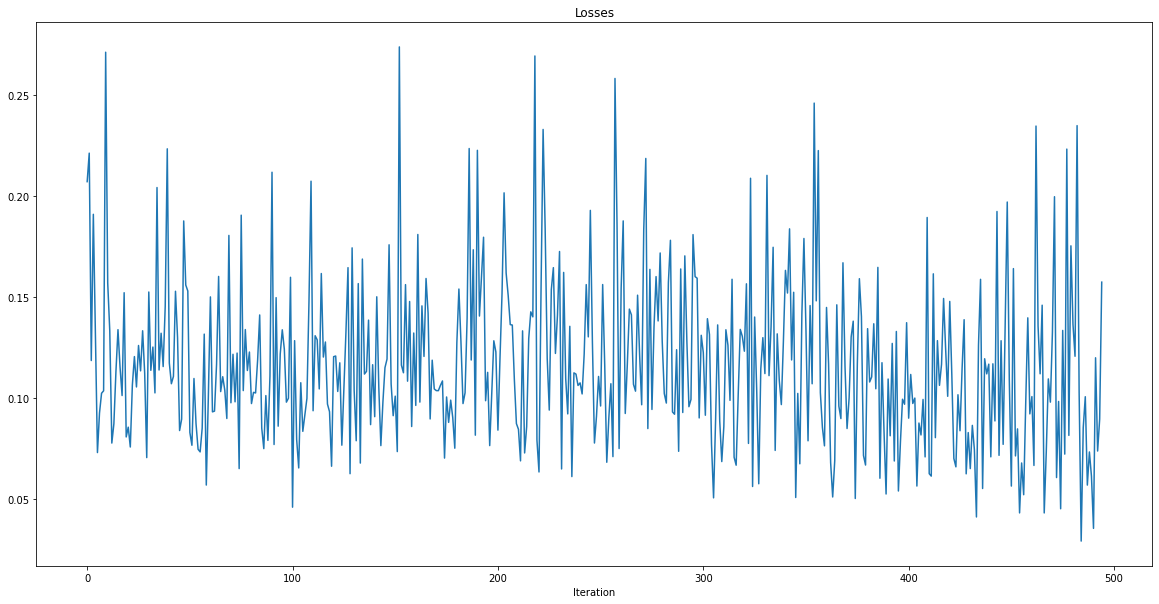

In [72]:
#plot the losses
losses = losses[5:]
plt.figure(figsize=(20,10))
plt.plot(range(len(losses)), losses)
plt.title('Losses')
plt.xlabel('Iteration')

#save it in the saving_dir
plt.savefig(os.path.join(saving_dir, 'losses.png'), dpi=300, facecolor='w')

plt.show()

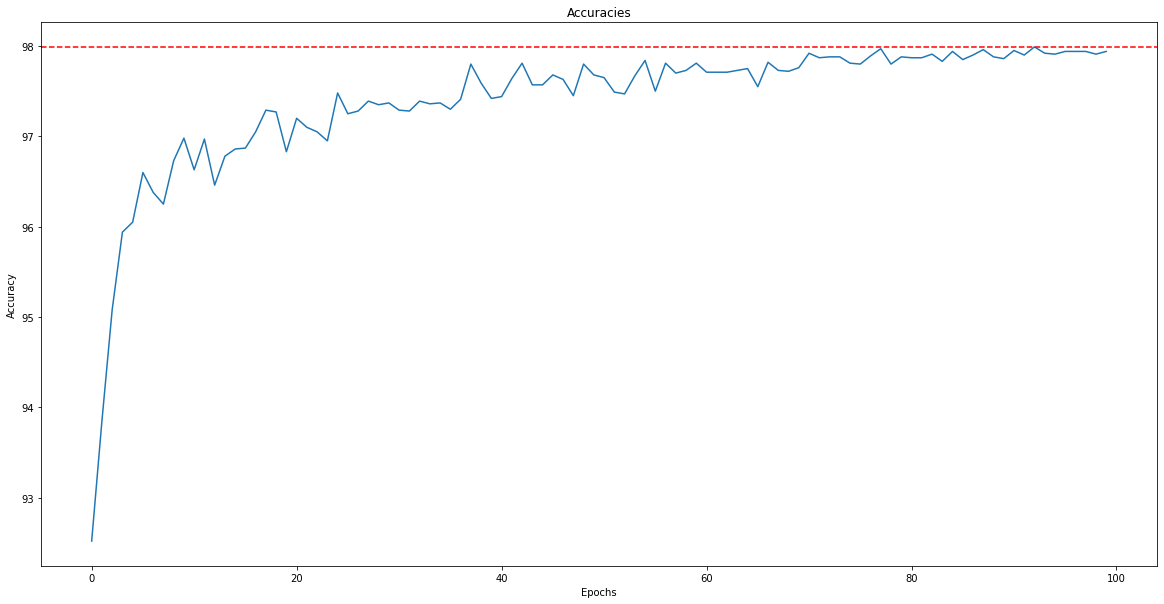

In [18]:
#plot the accuracy in the 'setup.log' file
accuracies = []
with open('setup.log', 'r') as file:
    contents = file.read()
    pattern = r'validation accuracy\s+(\d+\.\d+)' 
    matches = re.findall(pattern, contents)
    accuracies = [float(match) for match in matches]
    
plt.figure(figsize=(20,10))
plt.plot(range(len(accuracies)), accuracies)
#plot a line at the best accuracy
plt.axhline(y=max(accuracies), color='r', linestyle='--')
plt.title('Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

#save the figure
plt.savefig(os.path.join(saving_dir, 'accuracies.png'), dpi=300, facecolor='w')

plt.show()

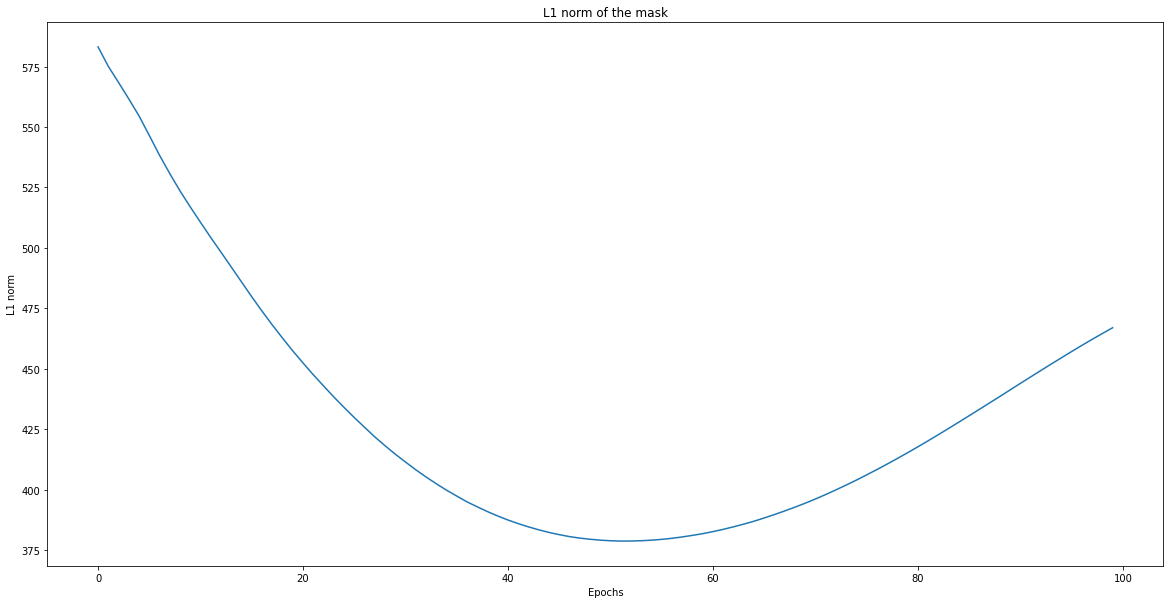

In [19]:
l1_list = [epoch_data[1] for epoch_data in epochs_data]

#plot the l1_list
plt.figure(figsize=(20,10))
plt.plot(range(len(l1_list)), l1_list)
plt.title('L1 norm of the mask')
plt.xlabel('Epochs')
plt.ylabel('L1 norm')

#save the figure
plt.savefig(os.path.join(saving_dir, 'l1_norm.png'), dpi=300, facecolor='w')

plt.show()

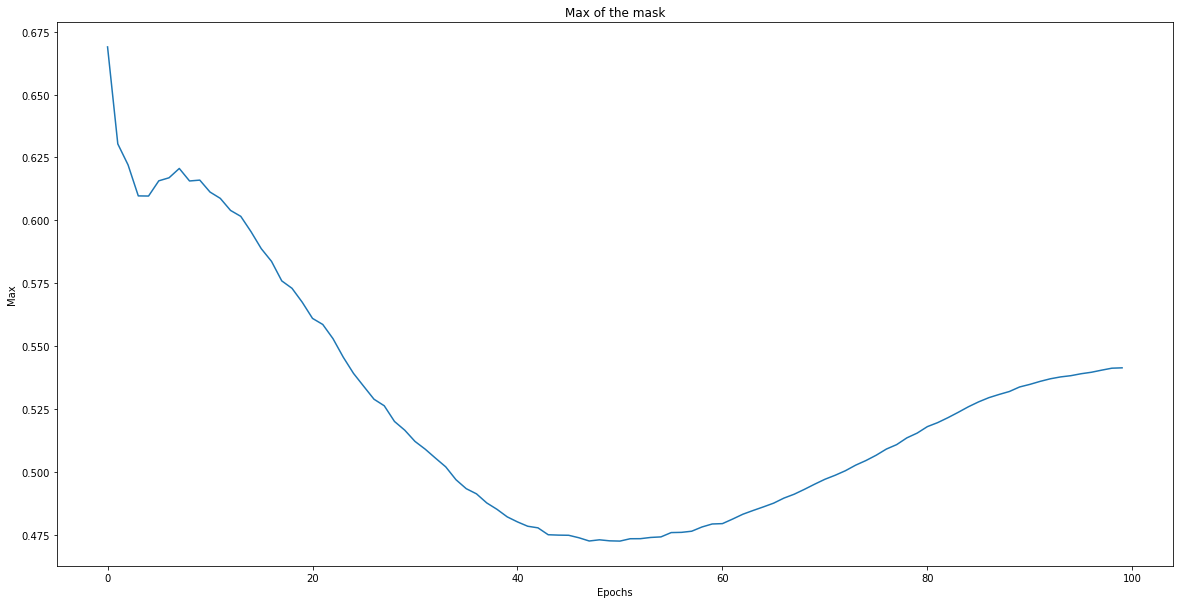

In [20]:
#same with maxi_list
maxi_list = [epoch_data[3] for epoch_data in epochs_data]

#plot the maxi_list
plt.figure(figsize=(20,10))
plt.plot(range(len(maxi_list)), maxi_list)
plt.title('Max of the mask')
plt.xlabel('Epochs')
plt.ylabel('Max')

#save the figure
plt.savefig(os.path.join(saving_dir, 'max.png'), dpi=300, facecolor='w')

plt.show()

# Comparison between BiP and pen_bip_1 on a certain segment.

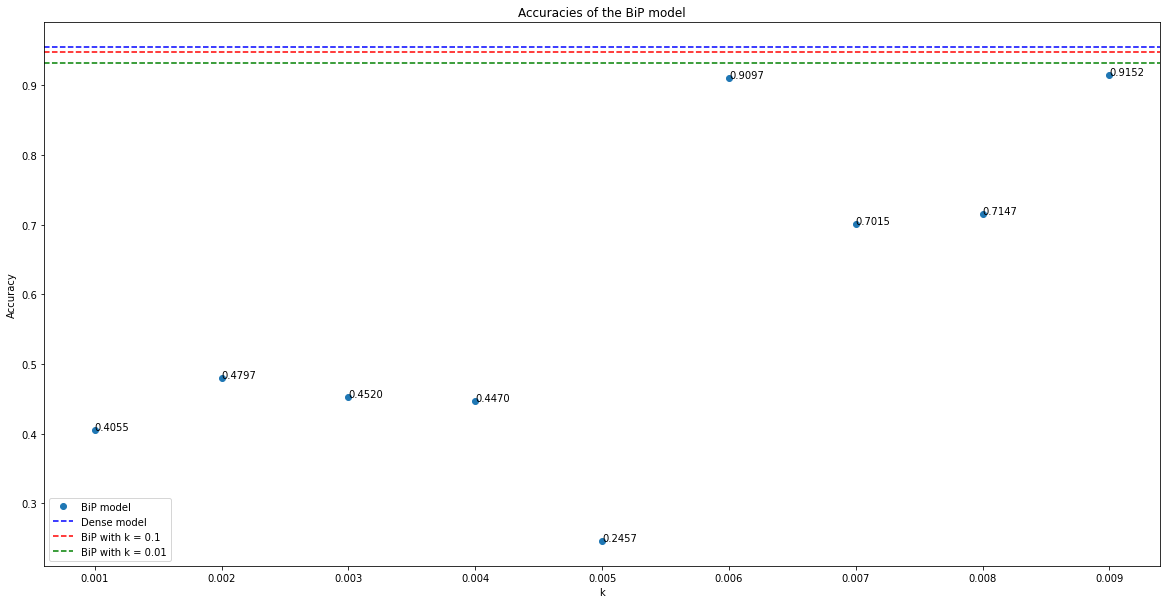

In [37]:
ks = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009]
accuracies_bip = [0.4055, 0.4797, 0.452, 0.447, 0.2457, 0.9097,0.7015, 0.7147, 0.9152]
dense_model = 0.955
bip_01 = 0.947
bip_001 = 0.9325

#plot the accuracies of the bip model
plt.figure(figsize=(20,10))
plt.plot(ks, accuracies_bip, 'o', label='BiP model')
#put also the value on the y axis for the dense model, bip_01 and bip_001
plt.axhline(y=dense_model, color='b', linestyle='--', label='Dense model')
plt.axhline(y=bip_01, color='r', linestyle='--', label='BiP with k = 0.1')
plt.axhline(y=bip_001, color='g', linestyle='--', label='BiP with k = 0.01')
#annotate the points with their value of accuracy:
for i, k in enumerate(ks):
    plt.annotate('{:.4f}'.format(accuracies_bip[i]), (k, accuracies_bip[i]))


plt.title('Accuracies of the BiP model')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

#save the figure
plt.savefig(os.path.join(saving_dir, 'accuracies_bip.png'), dpi=300, facecolor='w')

plt.show()


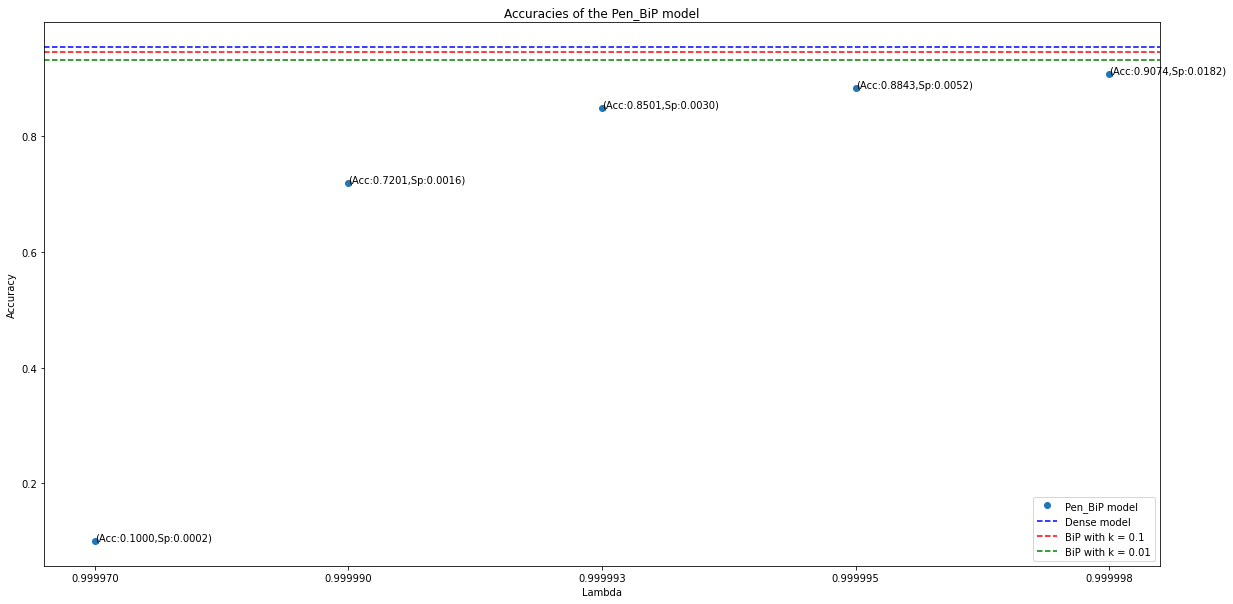

In [38]:
ls = ['0.999970', '0.999990', '0.999993', '0.999995', '0.999998']
accuracies_pen_bip_1 = [0.1, 0.72009, 0.85009, 0.8843, 0.9074]
sparsities_pen_bip_1 = [1758/n, 17364/n ,33415/n, 58584/n, 203157/n]

#plot the accuracies of the pen_bip_1 model
plt.figure(figsize=(20,10))
plt.plot(ls, accuracies_pen_bip_1, 'o', label='Pen_BiP model')
#put also the value on the y axis for the dense model, bip_01 and bip_001
plt.axhline(y=dense_model, color='b', linestyle='--', label='Dense model')
plt.axhline(y=bip_01, color='r', linestyle='--', label='BiP with k = 0.1')
plt.axhline(y=bip_001, color='g', linestyle='--', label='BiP with k = 0.01')

#annotate each point with the values of (accuracy,sparsity)
for i, l in enumerate(ls):
    plt.annotate('(Acc:{:.4f},Sp:{:.4f})'.format(accuracies_pen_bip_1[i], sparsities_pen_bip_1[i]), (l, accuracies_pen_bip_1[i]))

plt.title('Accuracies of the Pen_BiP model')
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.legend()

#save the figure
plt.savefig(os.path.join(saving_dir, 'accuracies_pen_bip_1.png'), dpi=300, facecolor='w')

plt.show()

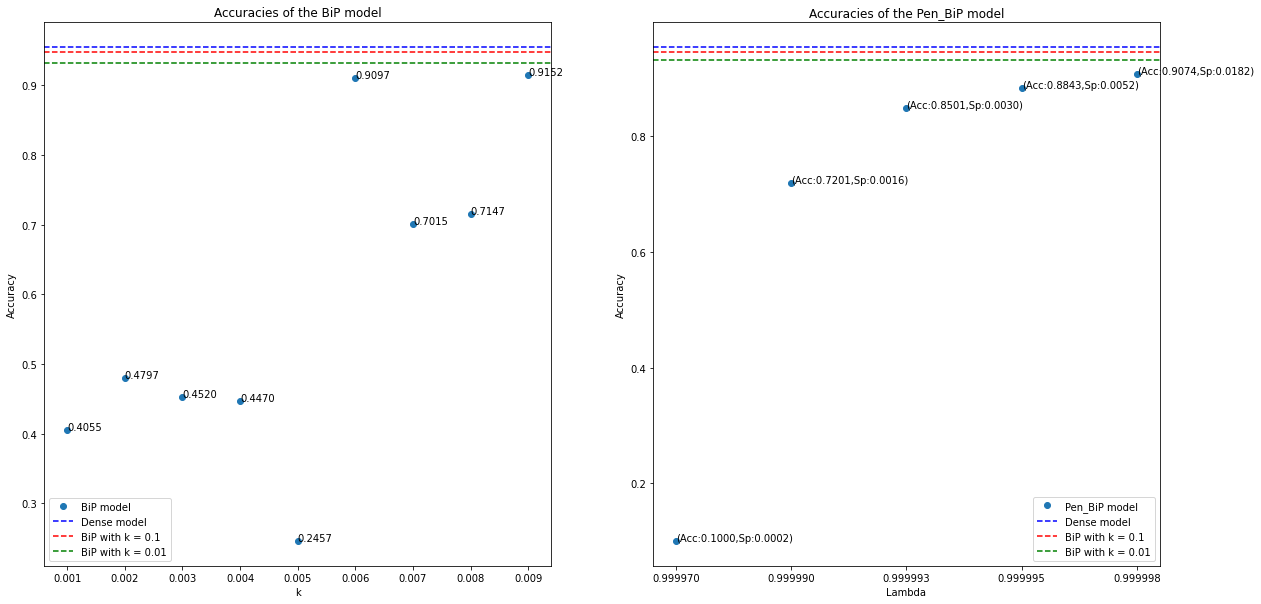

In [35]:
#do a big plot, with two subplots in it (left and right)
#one plot is the accuracies of the bip model
#the other is the accuracies of the pen_bip_1 model

#plot the accuracies of the bip model
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(ks, accuracies_bip, 'o', label='BiP model')
#put also the value on the y axis for the dense model, bip_01 and bip_001
plt.axhline(y=dense_model, color='b', linestyle='--', label='Dense model')
plt.axhline(y=bip_01, color='r', linestyle='--', label='BiP with k = 0.1')
plt.axhline(y=bip_001, color='g', linestyle='--', label='BiP with k = 0.01')
#annotate the points with their value of accuracy:
for i, k in enumerate(ks):
    plt.annotate('{:.4f}'.format(accuracies_bip[i]), (k, accuracies_bip[i]))

plt.title('Accuracies of the BiP model')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

#plot the accuracies of the pen_bip_1 model
plt.subplot(1,2,2)
plt.plot(ls, accuracies_pen_bip_1, 'o', label='Pen_BiP model')

#put also the value on the y axis for the dense model, bip_01 and bip_001
plt.axhline(y=dense_model, color='b', linestyle='--', label='Dense model')
plt.axhline(y=bip_01, color='r', linestyle='--', label='BiP with k = 0.1')
plt.axhline(y=bip_001, color='g', linestyle='--', label='BiP with k = 0.01')

#annotate each point with the values of (accuracy,sparsity)
for i, l in enumerate(ls):
    plt.annotate('(Acc:{:.4f},Sp:{:.4f})'.format(accuracies_pen_bip_1[i], sparsities_pen_bip_1[i]), (l, accuracies_pen_bip_1[i]))

plt.title('Accuracies of the Pen_BiP model')
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.legend()

#save the figure
plt.savefig(os.path.join(saving_dir, 'accuracies_bip_pen_bip_1.png'), dpi=300, facecolor='w')

plt.show()

# Experiences with alphas

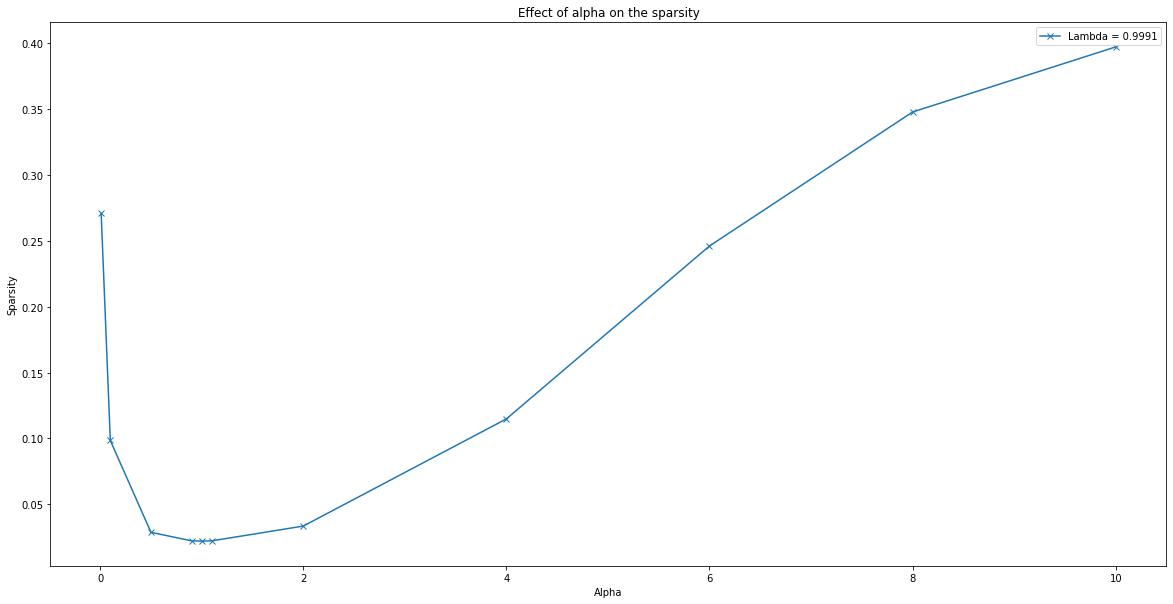

In [68]:
n_mnist = 166248
alphas = [0.01, 0.1, 0.5, 0.9, 1, 1.1, 2, 4, 6, 8, 10]
l0_norms = [45000/n_mnist, 16362/n_mnist, 4782/n_mnist, 3702/n_mnist, 3672/n_mnist, 3704/n_mnist, 5566/n_mnist, 19087/n_mnist,40902/n_mnist,57805/n_mnist ,66015/n_mnist]

#plot the l0 norms of the bip model
#with a cross on the points (alpha, l0_norm)
plt.figure(figsize=(20,10))
plt.plot(alphas, l0_norms, '-x', label='Lambda = 0.9991')

plt.xlabel('Alpha')
plt.ylabel('Sparsity')
plt.title('Effect of alpha on the sparsity')
plt.legend()

#save the figure
plt.savefig(os.path.join(saving_dir, 'l0_norms_bip.png'), dpi=300, facecolor='w')

plt.show()

# Duality gap bis

In [59]:
#open the file epochs_data.npy in the current directory
epochs_data = np.load('epochs_data.npy', allow_pickle=True)
duality_gaps = np.concatenate([epoch_data[-2] for epoch_data in epochs_data])
losses = [epoch_data[-1][0] for epoch_data in epochs_data]

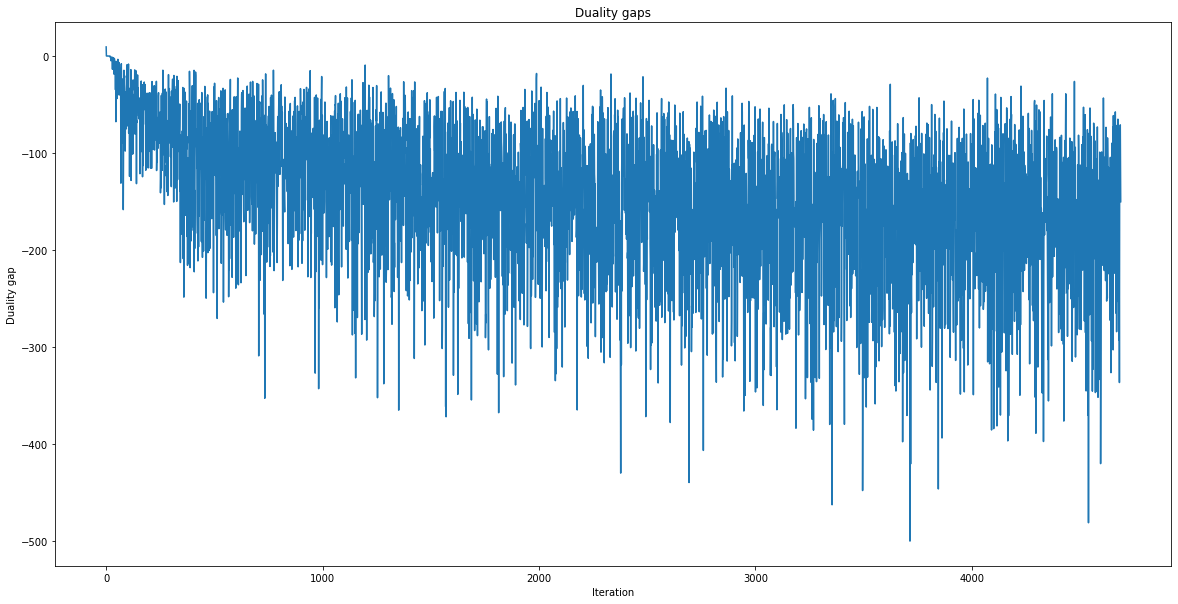

In [60]:
#plot the duality gaps
plt.figure(figsize=(20,10))
plt.plot(range(len(duality_gaps)), duality_gaps)
plt.title('Duality gaps')
plt.xlabel('Iteration')
plt.ylabel('Duality gap')

#save it in the saving_dir
plt.savefig(os.path.join(saving_dir, 'duality_gaps.png'), dpi=300, facecolor='w')

plt.show()